# check red-wine quality 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winequalityred/winequality-red.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/winequalityred/winequality-red.csv",sep=",")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997832,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data= scaler.fit_transform(df.drop(labels = ['quality'],axis = 1))


In [8]:

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [9]:
new_df = pd.DataFrame(data = new_data , columns = columns)
X = new_df

In [10]:
y = df["quality"]


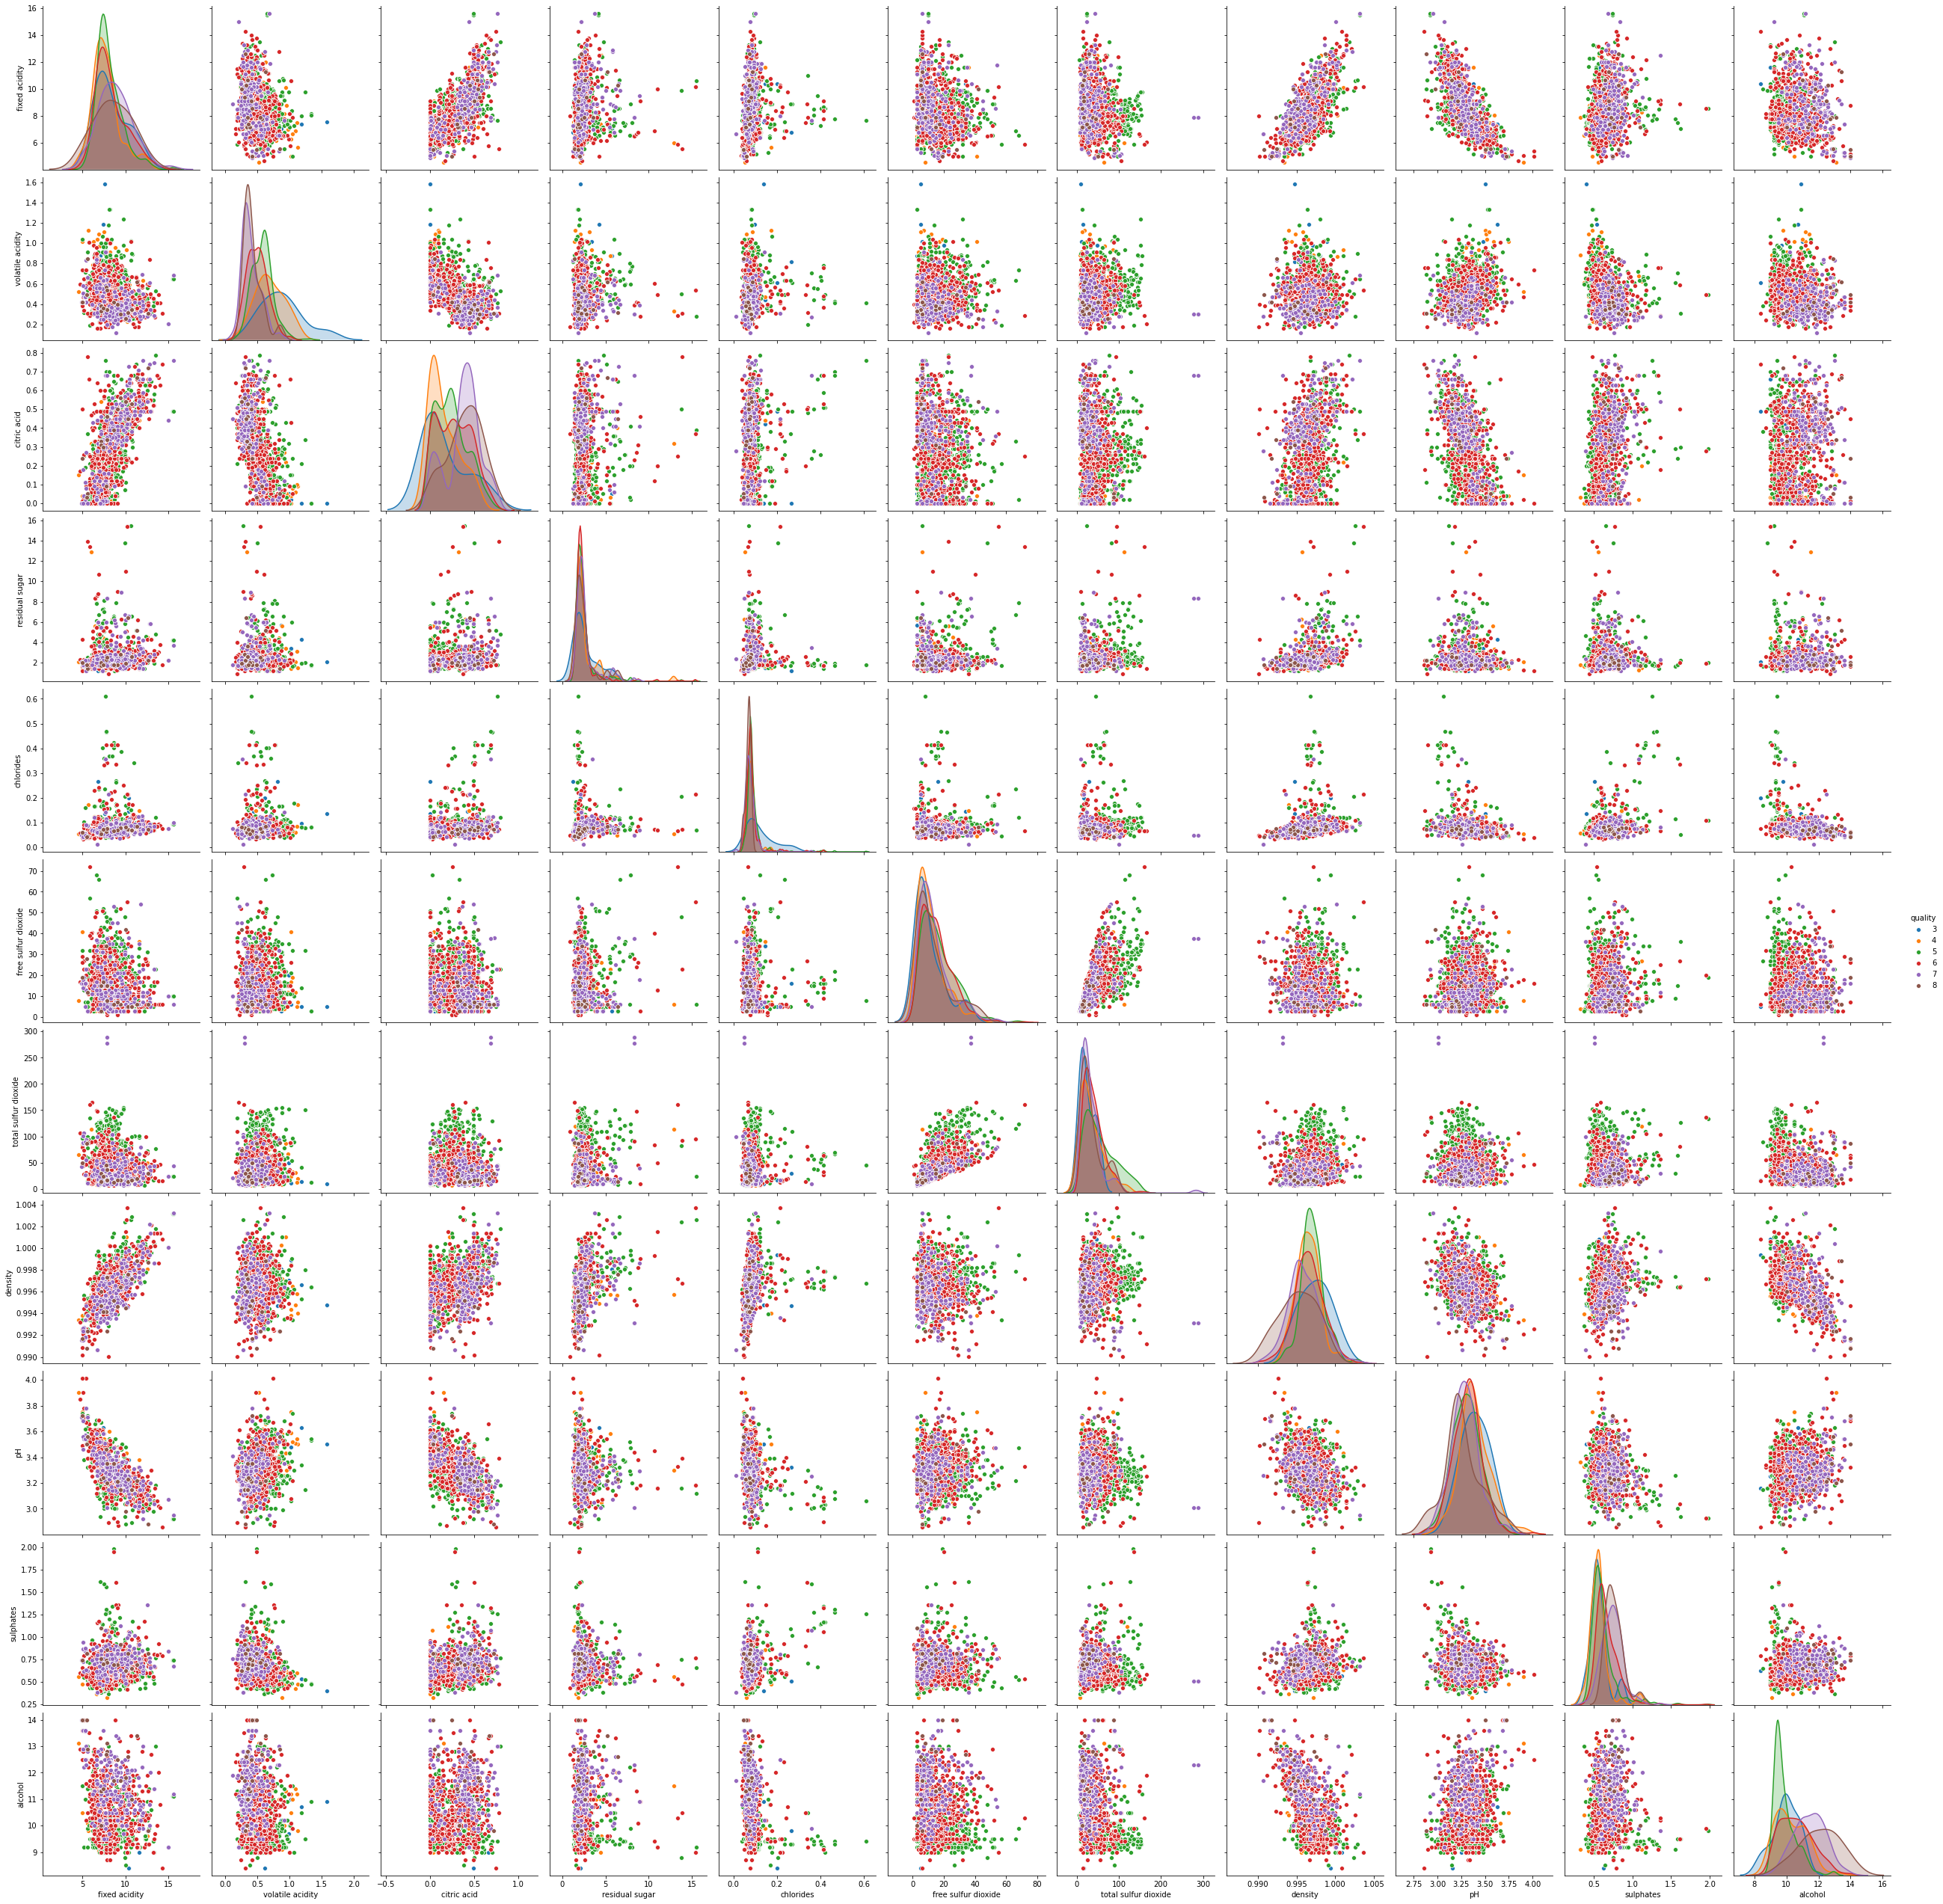

In [11]:
sns.pairplot(df,hue='quality',height=3.2)

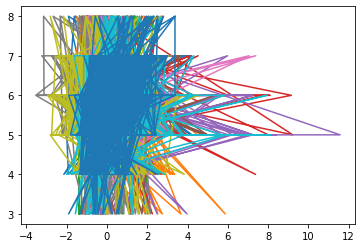

In [12]:
plt.plot(X,y)
plt.show()

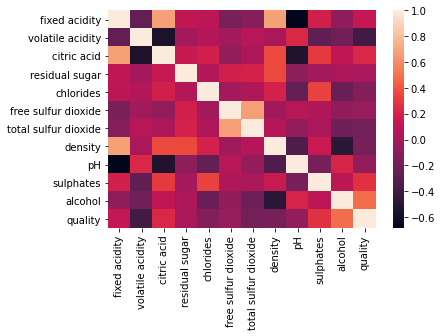

In [13]:
sns.heatmap(df.corr())

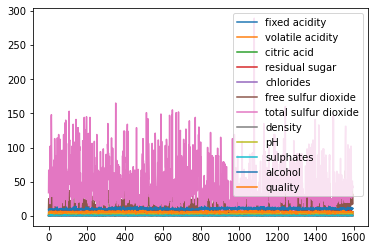

In [14]:
df.plot()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.85 , random_state=150)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [18]:
model.predict(X_test)

array([5, 6, 5, ..., 5, 6, 6])

In [19]:
score = accuracy_score(y_test,model.predict(X_test))

In [20]:
from sklearn.model_selection import GridSearchCV


In [21]:
param_grid = {'C':[0.1,1,10,20,50,100,500,1000],'gamma':[1,0.01,0.1,1.5,2.5,0.001,0.89],'degree':range(1,10)}

In [22]:
grid = GridSearchCV(SVC(),param_grid,verbose=5)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
[CV] C=0.1, degree=1, gamma=1 ........................................
[CV] ............ C=0.1, degree=1, gamma=1, score=0.417, total=   0.0s
[CV] C=0.1, degree=1, gamma=1 ........................................
[CV] ............ C=0.1, degree=1, gamma=1, score=0.438, total=   0.0s
[CV] C=0.1, degree=1, gamma=1 ........................................
[CV] ............ C=0.1, degree=1, gamma=1, score=0.417, total=   0.0s
[CV] C=0.1, degree=1, gamma=1 ........................................
[CV] ............ C=0.1, degree=1, gamma=1, score=0.417, total=   0.0s
[CV] C=0.1, degree=1, gamma=1 ........................................
[CV] ............ C=0.1, degree=1, gamma=1, score=0.426, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.01 .....................................
[CV] ......... C=0.1, degree=1, gamma=0.01, score=0.417, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.01 .....................................
[CV] ........

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, degree=1, gamma=1.5, score=0.417, total=   0.0s
[CV] C=0.1, degree=1, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=1, gamma=1.5, score=0.417, total=   0.0s
[CV] C=0.1, degree=1, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=1, gamma=1.5, score=0.426, total=   0.0s
[CV] C=0.1, degree=1, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=1, gamma=2.5, score=0.417, total=   0.0s
[CV] C=0.1, degree=1, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=1, gamma=2.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=1, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=1, gamma=2.5, score=0.417, total=   0.0s
[CV] C=0.1, degree=1, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=1, gamma=2.5, score=0.417, total=   0.0s
[CV] C=0.1, degree=1, gamma=2.5 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   30.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 20, 50, 100, 500, 1000],
                         'degree': range(1, 10),
                         'gamma': [1, 0.01, 0.1, 1.5, 2.5, 0.001, 0.89]},
             verbose=5)

In [24]:
grid.best_params_

{'C': 20, 'degree': 1, 'gamma': 0.01}

In [25]:
model_new = SVC(C=1,degree=6,gamma=0.1)
model_new.fit(X_train,y_train)

SVC(C=1, degree=6, gamma=0.1)

In [26]:
model_new.predict(X_test)

array([5, 6, 5, ..., 5, 6, 6])

In [27]:
score2 = accuracy_score(y_test,model_new.predict(X_test))
score2

0.5777450257921887